# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

In [2]:
north_df = pd.read_csv('NorthCallCenter.csv')
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [3]:
south_df = pd.read_csv('SouthCallCenter.csv')
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [4]:
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [5]:
#Code Used: 
num_rep_north_df = north_df['Rep ID'].nunique()
num_rep_north_df

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
#Code Used: 
num_rep_south_df = south_df['Rep ID'].nunique()
num_rep_south_df                 

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
print("Average Times For The North Branch:")
north_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time", "During Call Wait Time"]].mean()              

Average Times For The North Branch:


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
print("Average Times For The South Branch:")
south_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time", "During Call Wait Time"]].mean()  

Average Times For The South Branch:


Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
print('The Total Numbers of calls per Time Block:')
north_south_merged_total = pd.concat([north_df, south_df])\
.groupby('Time Block')\
.sum()
north_south_merged_total['Calls']

The Total Numbers of calls per Time Block:


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, there is missing data. 
67% of the "Incoming Wait Time" is missing for the North Call Center and
60% of the "Incoming Wait Time" is missing for the South Call Center.
Interestingly, upon further review, this missing information seems to be towards the end, where the calls are "outgoing". It's evident that the data is missing because outgoing calls do not have any "waiting time".  I will not do anything with the missing data.

In [10]:
# Code Used
# Add Additional Cells as needed.

print("Percentage missing from each column in the North Call Center:")
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Percentage missing from each column in the North Call Center:
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [11]:
print("Percentage missing from each column in the South Call Center:")
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Percentage missing from each column in the South Call Center:
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [12]:
#north branch size
north_df.shape

(245, 15)

In [13]:
#Find duplicates in north branch
north_df_no_dups = north_df.drop_duplicates()
north_df_no_dups.shape

(245, 15)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: One has an additional space before the single quotes. I changed the dataframe by deleting the extra space by replacing the that entry with the correct entry.

In [14]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [15]:
#Correct "Sale" column to make all entries the same
north_df['Sale'] = north_df['Sale'].replace(['YES '],'YES')
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I did not find duplicates in the data set. 

In [16]:
#Compare frame BEFORE and AFTER dropping duplicates. BOTH are the same size
north_df.shape

north_df_dup_drop = north_df.drop_duplicates()

north_df_dup_drop.shape

(245, 15)

In [17]:
#Compare South dataframe BEFORE and AFTER, dropping duplicates. BOTH are the same size
south_df.shape

south_df_dup_drop = south_df.drop_duplicates()

south_df_dup_drop.shape


(314, 15)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: At first, i thought the redundant name of the call center, 'North' and 'South' on the individual DF, was redundant, but in comparing the dataframes, it was essential for identifying where the information was from. Also the column "Call" had only one unique identifier throughout. I believe further down the values in each cell might be useful when comaring and analyzing data, so i chose to keep it.

In [18]:
#look at unique values in the 'Calls' column.If all are the same, determine if can drop the column.
north_df['Calls'].unique()

array([1], dtype=int64)

In [19]:
#look at unique values in the 'Calls' column.If all are the same, determine if can drop the column.
south_df['Calls'].unique()

array([1], dtype=int64)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [20]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])
df.shape

(559, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the highest number of calls and their total calls:
- North Branch = Brent, 37 calls total
- South Branch = Eric, 35 calls total

In [21]:
# Find how many Rep ID there are from both the north and south call centers. To make sure accurate output-> 20
grouped_north_south = df.groupby('Rep ID').sum().reset_index(inplace = False)
grouped_north_south['Rep ID'].nunique()

20

In [22]:
#Grouped by Rep ID -> calls
grouped_north_south = df.groupby(['Rep ID','Branch']).sum().reset_index(inplace = False)
grouped_north_south.sort_values(by=['Calls'],ascending = False)


,Rep ID,Branch,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
3,Brent,North,4840,0,1,362,71,17.0,117,37
6,Eric,South,5039,0,0,361,54,47.0,112,35
14,Randy,South,4576,3,1,320,66,47.0,98,33
15,Sandy,South,4694,1,0,325,60,34.0,100,32
8,Helga,South,5236,0,2,292,58,36.0,95,31
13,Lilly,North,3375,0,2,307,59,37.0,88,30
18,Todd,North,4252,1,0,296,58,21.0,97,29
5,Duke,North,2999,2,0,292,56,39.0,85,29
7,George,South,4620,0,0,298,53,41.0,87,29
12,Kate,South,4615,0,0,291,61,37.0,83,29


In [23]:
#Grouped by Rep ID AND my BRANCH
# grouped_north_south = df.groupby('Rep ID').sum().reset_index(inplace = False)
# grouped_north_south.sort_values(by=['Calls','Branch'],ascending = False)

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.98%
- Do any of these fall out of the optimal range of 2-5%? NONE of these fall out of the optimal range of 2-5%.

In [24]:
#Abandonment_Rate_North
                                        
NAR = north_df['Abandoned'].mean()*100
NAR

2.857142857142857

In [25]:
#Abandonment_Rate_South
                                        
SAR = south_df['Abandoned'].mean()*100
SAR

1.2738853503184715

In [26]:
#Abandonment_Company
                                        
CAR = df['Abandoned'].mean()*100
CAR

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls
- South Branch = 38.10%, 48 calls
- Company Wide = 38.94%, 81 calls

In [27]:
#North call center SERVICE LEVEL
(north_df['Incoming Wait Time'] <= 2).sum()/north_df['Incoming Wait Time'].count()*100

40.243902439024396

In [28]:
#NORTH CALL CENTER SERVICE LEVEL CALLS
(north_df['Incoming Wait Time'] <= 2).sum()

33

In [29]:
#SOUTH call center SERVICE LEVEL
(south_df['Incoming Wait Time'] <= 2).sum()/south_df['Incoming Wait Time'].count()*100

38.095238095238095

In [30]:
#souTH CALL CENTER SERVICE LEVEL CALLS
(south_df['Incoming Wait Time'] <= 2).sum()

48

In [31]:
#COMPANY call center SERVICE LEVEL
(df['Incoming Wait Time'] <= 2).sum()/df['Incoming Wait Time'].count()*100

38.94230769230769

In [32]:
#COMPANY call center SERVICE LEVEL CALLS
(df['Incoming Wait Time'] <= 2).sum()

81

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 sec
- South Branch in seconds = 3.00 sec
- Company Wide in seconds = 3.02 sec


In [33]:
# NORTH AVERAGE SPEED 
north_df['Incoming Wait Time'].mean()

3.048780487804878

In [34]:
# SOUTH AVERAGE SPEED 
south_df['Incoming Wait Time'].mean()

3.0

In [35]:
# COMPANY AVERAGE SPEED 
df['Incoming Wait Time'].mean()

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
Average Abandonment Rate:
A- 4.17%
B- 2.01%
C- 0.72%
D- 1.70%
##### Record your answer by double clicking here:
> Chart style you chose and why:
Chose "COLUMN" plot, for the visual CLARITY it allows. 


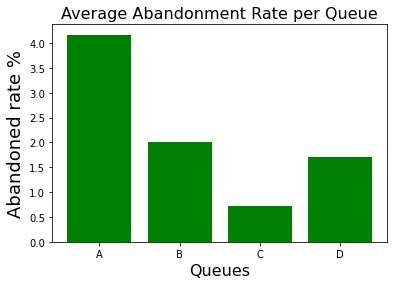

In [36]:
# Create visualization 1 here

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]*100

#Your Code Here:

data = abandonment_rates
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values,color = "green",tick_label=names)
plt.xlabel('Queues', size= 16,color = 'black')
plt.ylabel('Abandoned rate %',size = 18, color='black')
plt.title('Average Abandonment Rate per Queue',size = 16, color = 'black')
#plt.savefig('bar_vertical.png')
plt.show()


In [37]:
#Abandonment Rates per Queue
abandonment_rates

{'A': 4.166666666666666,
 'B': 2.013422818791946,
 'C': 0.7246376811594203,
 'D': 1.7045454545454544}

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

Service % per Rep   Average Speed of Answer:
Rep ID			
Amanda	60.0%---->   2.4 sec   
Andy	30.0%---->   3.6 sec
Brent	75.0%---->   2.12 sec
Cam		45.5%---->   2.91 sec
Duke	42.9%---->   2.79 sec
Joe		20.0%---->   3.60 sec
Lilly	33.3%---->   3.08 sec
Todd	33.3%---->   3.50 sec
Xander	33.3%---->   3.33 sec

> Chart style you chose and why: For this particular situation, I chose the bar plot, for how easy it identifies service and average speed.

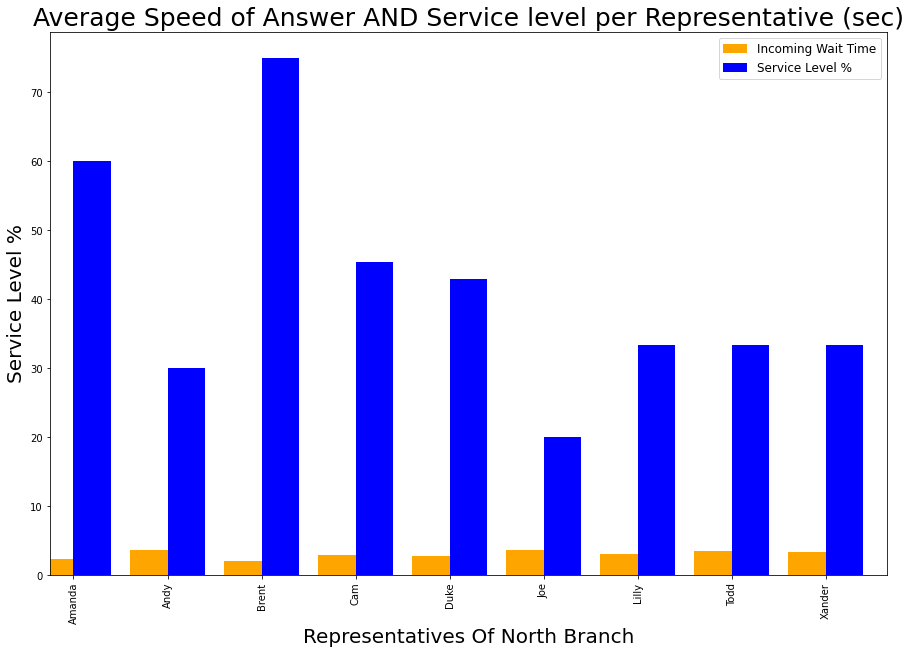

In [41]:
#Visualization #2
# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on ="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#*Your Code Here:
fig= plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax2 = ax
width = 0.4
north_plt.plot(kind = 'bar', color = 'orange', ax=ax, width=width, position = 1,secondary_y = 'Average_Speed')
service_level['Service Level %'].plot(kind = 'bar', color = 'blue',ax=ax2, width=width, position = 0)
ax.set_ylabel('Incoming Wait Time', color='black',fontsize=20)
ax2.set_ylabel('Service Level-%',color='black', fontsize = 20)
plt.xlabel("Representatives Of North Branch", size= 20)
plt.ylabel("Service Level %",size = 20)
plt.title("Average Speed of Answer AND Service level per Representative (sec)",color='black', fontsize = 25)
plt.legend(fontsize= 12)
plt.show()



In [ ]:
service_level

In [ ]:
# Average Speed of Answers by REP
north_plt["Incoming Wait Time"].plot(kind = "bar")
plt.xlabel("Representatives Of North Branch", size= 16)
plt.ylabel("Average Wait Times (sec) %",size = 12)
plt.title("Average Speed of Answer per Representative (sec)",size = 12)
plt.show()




In [ ]:
#Average speed of answer for each REP
north_plt

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here: 

Complaint- Incoming: 51

Product Support- Incoming: 82
                 Outgoing:228
                 
Sale Support- Incoming:75
              Outgoing:123

> Chart style you chose and why: I chose a stacked column chart because it rapidly identifies the distribution of calls by purpose AND by incoming/outgoing type in one column.

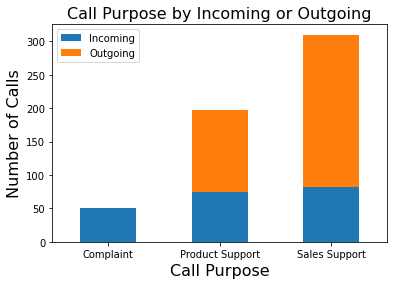

In [42]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

#purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
#purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

# print(complaints)
# print(product_support)
# print(sales_support)

#call_purpose = ["Complaint", "Product Support", "Sales Support"]
Call={"Complaint":[51,0], "Product Support":[75,123], "Sales Support":[82,228]}
# Incoming = [51,75,82]
# Outgoing = [0,123,228]

calls_df= pd.DataFrame(Call).T


# plt.bar(call_purpose, Incoming, 0.4, label = "Incoming", color="blue")
# plt.bar(call_purpose, Outgoing, 0.4, bottom = "Incoming", label="Outgoing", color="red")

Call={"Complaint":[51,0], "Product Support":[75,123], "Sales Support":[82,228]}
calls_df= pd.DataFrame(Call).T
calls_df.plot(kind="bar", stacked = True)
plt.xticks(rotation = 0)
plt.xlabel("Call Purpose", size = 16)
plt.ylabel("Number of Calls", size = 16)
plt.title("Call Purpose by Incoming or Outgoing", size = 16)
plt.legend(["Incoming","Outgoing"])
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
The South branch, in my opinion is working more efficiently.  Their abandonment rates were less than the North call center. Also, their average speed of answering was better than the North center. The South center service level was slightly diminished from the Nort call center, but their number of call handled was greater than those from the north.  In my opinion, the higher number of calls received could explain the lower service level the South call center had.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
I believe the North call center would benefit from extra help.  They have less call representatives-(9) vs 11 at the south call center. The north also has a higher abandonment rate of 2.86% vs 1.27 for the South call center; and their average speed of answering is slightly longer-3.05 seconds vs 3 seconds for the South call center.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
A great number of outgoing calls are going out for Sale Support. It would be interesting if you could analyze the type of sale support they are giving: Is a product defective that needs to be returned often? Are the advertized costs different from the actual cost of the merchandise? Are there delivery delays?  Solving any of these might free the agents from making so many outgoing calls and therefore help with the call center's efficiency.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
Time_per_block = df['Time Block']

# Use groupby and get_group to select which call purpose to plot: